In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar datos
data = pd.read_csv('C:/Users/USUARIO/OneDrive - SHI S.A.S/Camilo/ML/Time_Series_Forecasting_v2/raw_data.csv',
                   delimiter=";")  
data['fecha'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
data.set_index('fecha', inplace=True)
data.rename(columns={"Pptn1m [mm]": "PP"}, inplace=True)
series = data['PP'].values.reshape(-1, 1)

In [3]:
# Normalización
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

In [4]:
# Creación de secuencias
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)


SEQ_LENGTH = 12  # Por ejemplo, 12 meses para predecir el siguiente mes
X, y = create_sequences(series_scaled, SEQ_LENGTH)

In [5]:
# División en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Construcción del modelo RNN
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0611 - val_loss: 0.0273
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242 - val_loss: 0.0259
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - val_loss: 0.0262
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0246 - val_loss: 0.0245
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - val_loss: 0.0238
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0203 - val_loss: 0.0125
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - val_loss: 0.0124
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0098
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


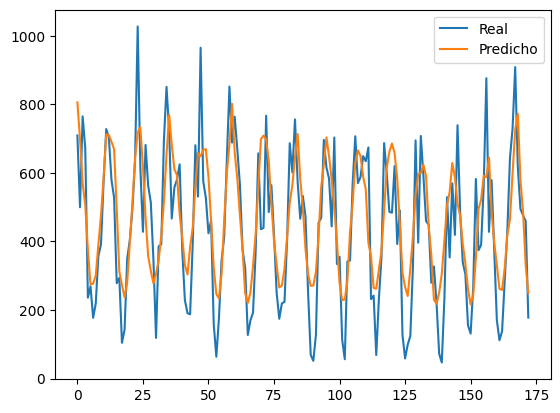

In [7]:
# Evaluación
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Visualización de resultados
import matplotlib.pyplot as plt
plt.plot(y_test, label='Real')
plt.plot(predicted, label='Predicho')
plt.legend()
plt.show()